# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.ensemble import BaggingClassifier

# Data Pre-processing

In [ ]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head(10)

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
print("No. of rows with null glucose value: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with null BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with null skin thikness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with null Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with null BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with null DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with null age: {0}".format(len(df.loc[df['Age'] == 0])))


In [ ]:
# replace missing values (0) with the mean values calculated from the non-missing values in each respective column.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])


In [ ]:
print("No. of rows with null glucose value: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("No. of rows with null BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("No. of rows with null skin thikness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("No. of rows with null Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("No. of rows with null BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("No. of rows with null DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("No. of rows with null age: {0}".format(len(df.loc[df['Age'] == 0])))

In [ ]:
df.head(10)

In [ ]:
f,ax = plt.subplots(1,2, figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()

plt.grid()
plt.show()

In [ ]:
df['Outcome'].value_counts()

# Splitting Data

In [ ]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 0)
mutual_info


In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

In [ ]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();
     

In [ ]:
df.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)

In [ ]:
df.head(10)

In [ ]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']
     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify =Y )

In [ ]:
print(X.shape, X_train.shape,y_train.shape, X_test.shape)

# Model Implementation

# Smote - ADASYN 

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE( sampling_strategy='minority',random_state=0)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

np.bincount(y_smote)

In [ ]:
# Before smote
y_train.value_counts()


In [ ]:
# outcome before smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')



plt.show()

In [ ]:
# after smote

y_smote.value_counts()

In [ ]:
# outcome after smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_smote.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')



plt.show()

# SVM

In [ ]:
cols_to_scale = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age']
scaler = MinMaxScaler()
scaler.fit(X_smote[cols_to_scale])
X_smote[cols_to_scale] = scaler.transform(X_smote[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
svm_clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
# fitting the model for grid search
svm_grid.fit(X_smote, y_smote)

In [ ]:
svm_grid.best_estimator_
svm_bestgrid=svm_grid.best_estimator_
svm_bestgrid

In [ ]:
y_pred=svm_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(svm_grid,X,Y,cv=skfold)

In [ ]:
cv_score

In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

# Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=50, max_samples=100, bootstrap=True,
                            n_jobs=1, random_state=42, oob_score=True)

bagging.fit(X_smote,y_smote)

In [ ]:
y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [ ]:
cv_score

In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

# Decision Tree

In [ ]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [ ]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=0)
dt.fit(X_smote, y_smote)

In [ ]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)


In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

# Logistic Regression

In [ ]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = { 'max_iter' : [10000],
               'warm_start' : ['False','True'],
               'penalty' : ['l1', 'l2', 'elasticnet', 'none']
               
               }

lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose  = 1,
    scoring='accuracy',
    cv = 3,
    n_jobs = 1
    )
    
lr_grid.fit(X_smote, y_smote)

In [ ]:
lr_bestgrid = lr_grid.best_estimator_


In [ ]:
y_pred=lr_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))
     

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

# Gaussian Naive Bayes

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_smote, y_smote)

In [ ]:
gs_NB.best_params_


In [ ]:
gs_NB=gs_NB.best_estimator_

In [ ]:
y_pred=gs_NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

# Random Forest

In [ ]:
###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

# XGBoost

In [ ]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#lrc = LogisticRegression(max_iter=1100)
abc = AdaBoostClassifier(n_estimators=50,base_estimator=rf,learning_rate=1).fit(X_smote, y_smote)

print(classification_report(y_test,abc.predict(X_test)))
     

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_smote, y_smote)

# accuracy score on the test data
knn_prediction = knn.predict(X_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

In [ ]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_smote, y_smote)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_smote, knn_clf.predict(X_smote)))
    test_acc.append(accuracy_score(y_test, y_pred))

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');
     

In [ ]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [36],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = 1
    )
    
knn_grid.fit(X_smote, y_smote)

In [ ]:
knn_grid.best_estimator_

In [ ]:
knn_bestgrid=knn_grid.best_estimator_

In [ ]:
knn_bestgrid

In [ ]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

# Soft Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('RF',RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)))
estimator.append(('SVC', SVC(C=100, gamma=0.1,probability=True)))
estimator.append(('ABC',AdaBoostClassifier(n_estimators=50,base_estimator=rf,learning_rate=1)))
estimator.append(('Bag',BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=1,random_state=42,
                           oob_score=True)))



# Voting Classifier with soft voting
Hyper_vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
Hyper_vot_soft.fit(X_smote, y_smote)
y_pred = Hyper_vot_soft.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(Hyper_vot_soft,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

In [274]:
final_roc_auc = []

In [275]:
probas1 = Hyper_vot_soft.predict_proba(X_test)[:, 1]

In [276]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)

In [277]:
print('roc_auc_score for Soft Voting Classifier: ', roc_auc_score(y_test, probas1))

roc_auc_score for Soft Voting Classifier:  0.8612962962962963


In [278]:
final_roc_auc.append({'model_name': 'Soft Voting Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})


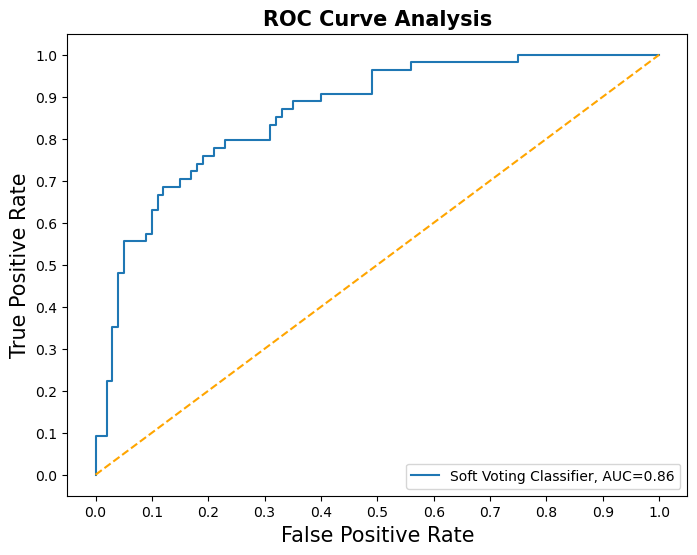

In [279]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

# ZeroR

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_smote, y_smote)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_smote, dummy_clf.predict(X_smote)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# AUC Curve

In [ ]:
DTC2=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=1,random_state=42,
                           oob_score=True)
DTC2.fit(X_smote, y_smote)


DTC3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)
DTC3.fit(X_smote, y_smote)

rf_randomcv2= RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
rf_randomcv2.fit(X_smote, y_smote)

SVC2=SVC(C=100, gamma=0.1,probability=True)
SVC2.fit(X_smote, y_smote)

lr_grid2= lr_bestgrid
lr_grid2.fit(X_smote, y_smote)

gs_NB2=gs_NB
gs_NB2.fit(X_smote, y_smote)

XGB_clf2=XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
XGB_clf2.fit(X_smote, y_smote)

knn_grid2= KNeighborsClassifier(n_neighbors=95,metric='manhattan', weights='distance')
knn_grid2.fit(X_smote, y_smote)

In [ ]:
final_roc_auc = []

In [ ]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = DTC2.predict_proba(X_test)[:, 1]
probas3 = knn_grid2.predict_proba(X_test)[:, 1]
probas4 = SVC2.predict_proba(X_test)[:, 1]
probas5 = rf_randomcv2.predict_proba(X_test)[:, 1]
probas6 = gs_NB2.predict_proba(X_test)[:, 1]
probas7 = abc.predict_proba(X_test)[:, 1]
probas8 = XGB_clf2.predict_proba(X_test)[:, 1]
probas9 = lr_grid2.predict_proba(X_test)[:, 1]
probas10 = Hyper_vot_soft.predict_proba(X_test)[:, 1]
probas11 = DTC3.predict_proba(X_test)[:, 1]

In [ ]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)
false_positive_rate7, true_positive_rate7, threshold6 = roc_curve(y_test, probas7)
false_positive_rate8, true_positive_rate8, threshold6 = roc_curve(y_test, probas8)
false_positive_rate9, true_positive_rate9, threshold6 = roc_curve(y_test, probas9)
false_positive_rate10, true_positive_rate10, threshold6 = roc_curve(y_test, probas10)
false_positive_rate11, true_positive_rate11, threshold6 = roc_curve(y_test, probas11)

In [ ]:
print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Bagging DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Naive Bays Classifier: ', roc_auc_score(y_test, probas6))
print('roc_auc_score for Ada Boost Classifier: ', roc_auc_score(y_test, probas7))
print('roc_auc_score for XG Boost Classifier: ', roc_auc_score(y_test, probas8))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, probas9))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas10))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas11))

In [ ]:
final_roc_auc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Bagging Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_auc.append({'model_name': 'Naive Bays Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})
final_roc_auc.append({'model_name': 'Ada Boost Classifier', 'fpr': false_positive_rate7, 'tpr': true_positive_rate7, 'auc': roc_auc_score(y_test, probas7)})
final_roc_auc.append({'model_name': 'XG Boost Classifier', 'fpr': false_positive_rate8, 'tpr': true_positive_rate8, 'auc': roc_auc_score(y_test, probas8)})
final_roc_auc.append({'model_name': 'Logistic Regression', 'fpr': false_positive_rate9, 'tpr': true_positive_rate9, 'auc': roc_auc_score(y_test, probas9)})
final_roc_auc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate10, 'tpr': true_positive_rate10, 'auc': roc_auc_score(y_test, probas10)})
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate11, 'tpr': true_positive_rate11, 'auc': roc_auc_score(y_test, probas11)})


In [ ]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [273]:
import pandas as pd
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

# Replace these with your actual models
models = {
    'ZeroR': dummy_clf,
    'Bagging_DT': bagging,
    'DecisionTree': dt,
    'LogisticRegression': lr_bestgrid,
    'NaiveBayes': gs_NB2,
    'RandomForest': rf_randomcv2,
    'XGBoost': XGB_clf2,
    'AdaBoost': abc,
    'KNN': knn_bestgrid,
    'SoftVoting': Hyper_vot_soft,
    'SVM': svm_bestgrid
}
# Initialize lists to store metrics
accuracy_scores = []
f1_scores = []
recall_scores = []
auc_scores = []

# Iterate through models
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # For models that have predict_proba method, calculate AUC
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None
    
    # Append metrics to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    auc_scores.append(auc)

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Recall': recall_scores,
    'AUC': auc_scores
})

# Display the table
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════╤════════════╤════════════╤══════════╤════════════╕
│    │ Model              │   Accuracy │   F1 Score │   Recall │        AUC │
╞════╪════════════════════╪════════════╪════════════╪══════════╪════════════╡
│  0 │ ZeroR              │   0.649351 │   0        │ 0        │   0.5      │
├────┼────────────────────┼────────────┼────────────┼──────────┼────────────┤
│  1 │ Bagging_DT         │   0.772727 │   0.684685 │ 0.703704 │   0.861574 │
├────┼────────────────────┼────────────┼────────────┼──────────┼────────────┤
│  2 │ DecisionTree       │   0.727273 │   0.66129  │ 0.759259 │   0.74963  │
├────┼────────────────────┼────────────┼────────────┼──────────┼────────────┤
│  3 │ LogisticRegression │   0.766234 │   0.684211 │ 0.722222 │   0.868148 │
├────┼────────────────────┼────────────┼────────────┼──────────┼────────────┤
│  4 │ NaiveBayes         │   0.733766 │   0.630631 │ 0.648148 │   0.826111 │
├────┼────────────────────┼────────────┼────────────┼──────────┼